In [3]:
import pandas as pd

In [4]:
data=pd.read_csv('dataset.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [7]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.752398e+06,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,3.321149e+06,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.876199e+06,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,5.752398e+06,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,8.628598e+06,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.150480e+07,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


In [5]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [8]:
data.shape

(11504798, 12)

In [40]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [9]:
import seaborn as sb

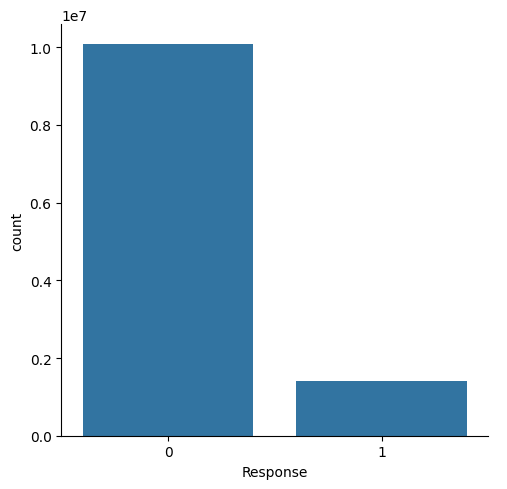

In [10]:
sb.catplot(x='Response',data=data,kind='count')

In [12]:
count_of_response=data['Response'].value_counts()
print(count_of_response)

Response
0    10089739
1     1415059
Name: count, dtype: int64


# the dataset is found to be imbalanced (we can also see the analysis from the bar chart), the dependent variable's category records should be balanced. only then we'll get an unbiased result . or else the result will be biased. on our case the "Response" type 0 is nearly 10 times greater than the "Response" type 1. so it is clearly imbalanced. We have to create a balanced dataset

# and also i'll take total of 40000 records with balanced records from both category. because it will be faster and easier to analyse and train.


Creating a Balanced Dataset

In [14]:
response_type_1_data=data[data['Response']==1]
response_type_0_data=data[data['Response']==0]


new_response_type_0_data=response_type_0_data.sample(n=20000,random_state=42)
new_response_type_1_data=response_type_1_data.sample(n=20000,random_state=42)

new_data=pd.concat([new_response_type_0_data,new_response_type_1_data],axis=0)

print(new_data.shape)

(40000, 12)


In [15]:
print(new_response_type_0_data.shape)
print(new_response_type_1_data.shape)

(20000, 12)
(20000, 12)


In [16]:
print(new_data.describe())

                 id           Age  Driving_License   Region_Code  \
count  4.000000e+04  40000.000000     40000.000000  40000.000000   
mean   5.736632e+06     40.524700         0.998550     26.654100   
std    3.330996e+06     13.839465         0.038052     12.277649   
min    5.600000e+02     20.000000         0.000000      0.000000   
25%    2.860676e+06     27.000000         1.000000     18.000000   
50%    5.741592e+06     41.000000         1.000000     28.000000   
75%    8.621320e+06     50.000000         1.000000     33.000000   
max    1.150478e+07     83.000000         1.000000     52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel       Vintage  \
count        40000.000000    40000.000000          40000.000000  40000.000000   
mean             0.267525    31076.825150            102.806575    162.465225   
std              0.442674    17088.307494             55.898988     79.653641   
min              0.000000     2630.000000              1.000000

Analysing the Distribution and Correlation

In [53]:
num_variables=['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']
cat_variables=['Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Gender']

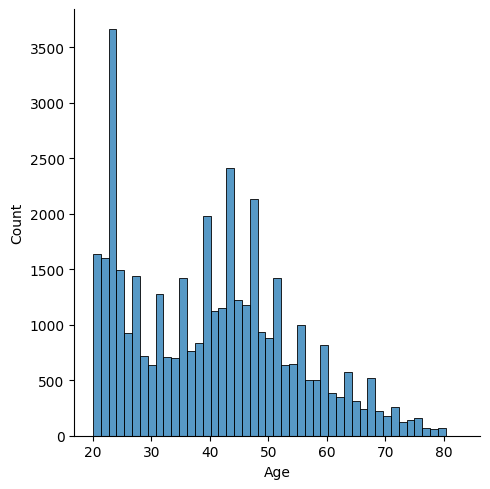

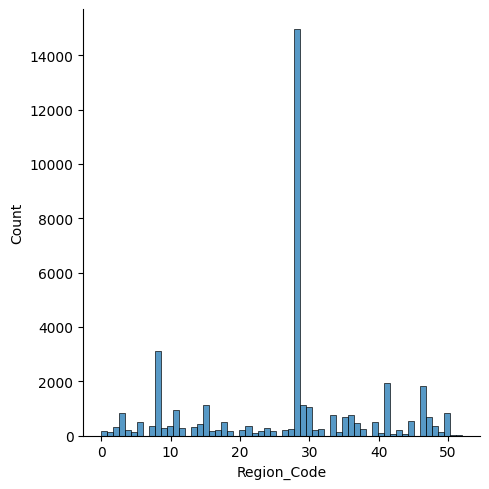

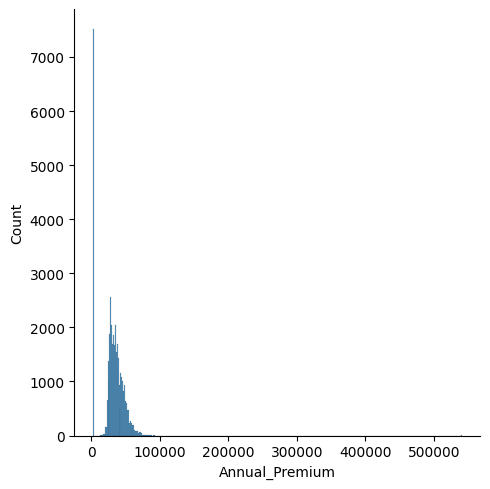

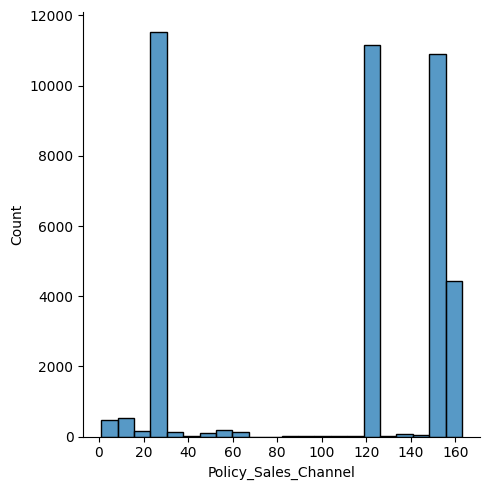

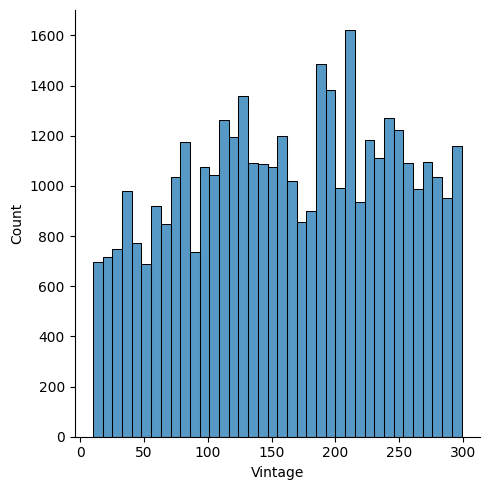

In [26]:
for i in num_variables:
    sb.displot(new_data,x=i)

we'll see the linearinty among the independent variables to the dependent variable

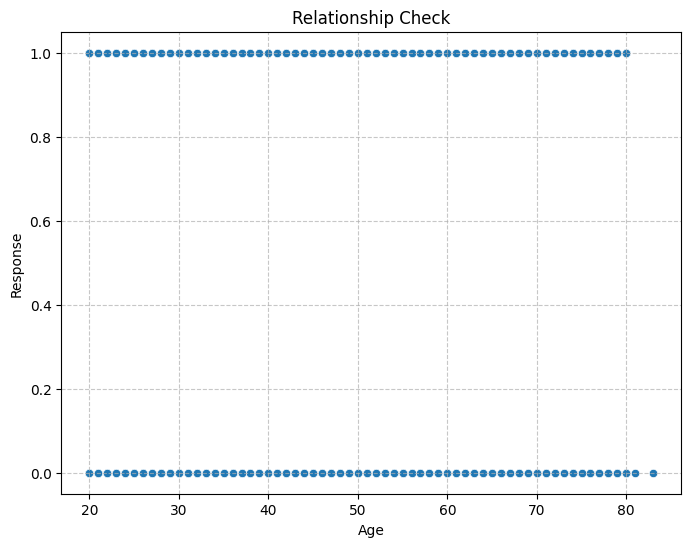

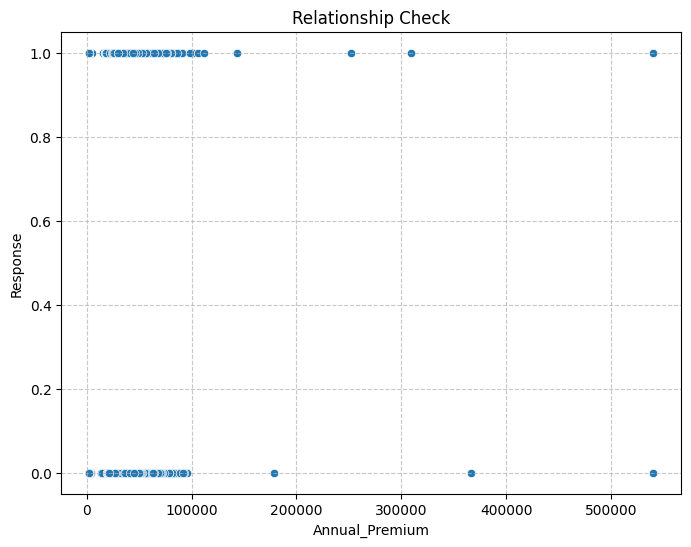

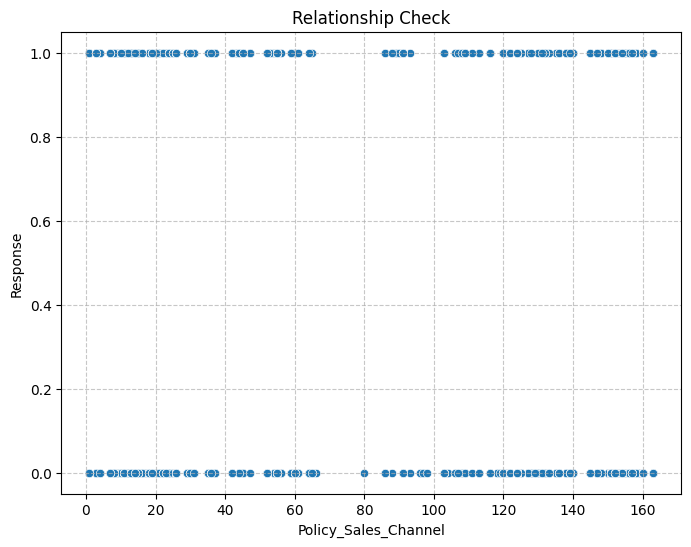

In [215]:
from matplotlib import pyplot as plt
import seaborn as sb
for i in num_variables:
    plt.figure(figsize=(8, 6))
    sb.scatterplot(x=new_data[i], y=new_data['Response'])
    plt.xlabel(i)
    plt.ylabel('Response')
    plt.title('Relationship Check')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

In [ ]:
#find skewness:

for i in num_variables:
    skew_val=new_data[i].skew()
    if skew_val>1 or skew_val<-1:
        print(i,skew_val) 
        
        
#the annual premium is the highly right skewed. if needed we can do any transformation on the variable to make it normally distributed.

Annual_Premium 1.3883514819668155


In [ ]:
#we'll see the correlation between the independent variables vs dependent variable
# to see which we can drop(feature selection):


import matplotlib.pyplot as plt


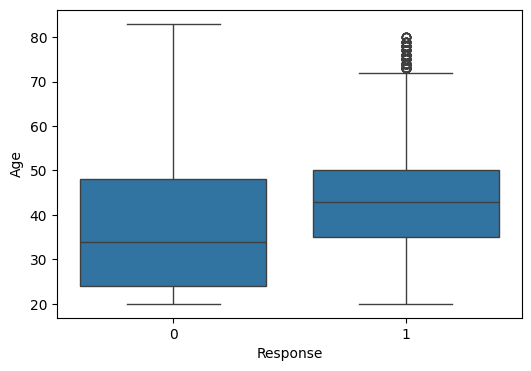

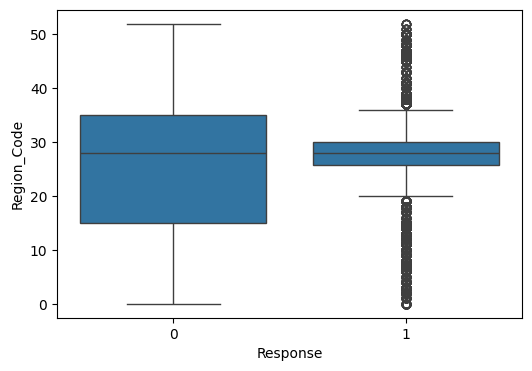

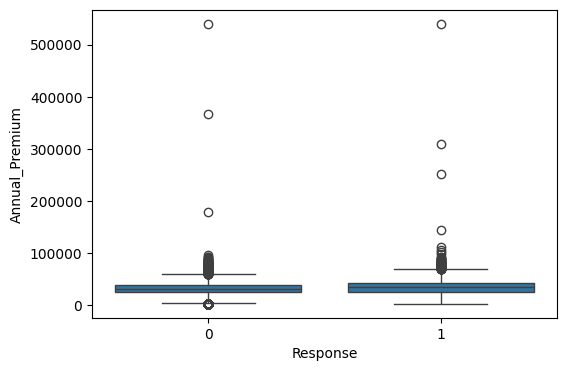

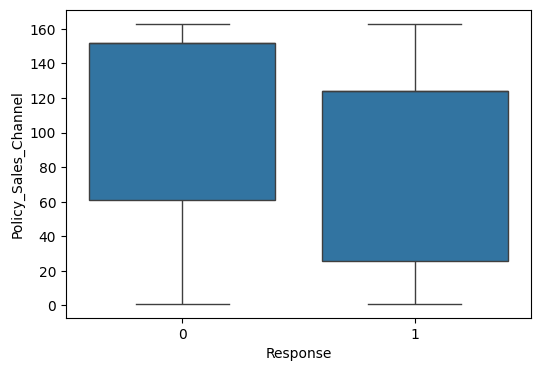

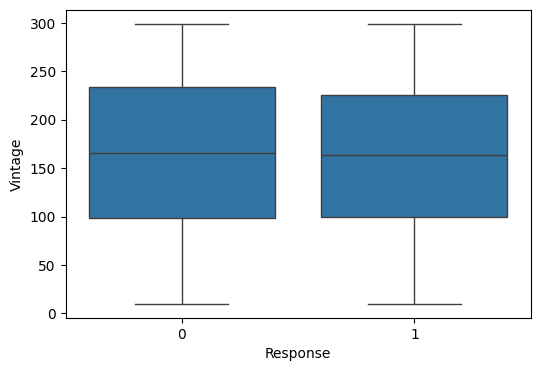

In [31]:
for i in num_variables:
    plt.figure(figsize=(6, 4))
    sb.boxplot(x='Response', y=i, data=new_data)
    plt.show()

From the box plot we can see that there is no significant change in median, quartile range, 
So i'm dropping the Vintage Feature

In [45]:
new_data.drop(['Vintage'],axis=1,inplace=True)

In [46]:
new_data.shape

(40000, 10)

In [ ]:
#t-test for age
from scipy.stats import ttest_ind

age_0=new_data[new_data['Response']==0]['Age']
age_1=new_data[new_data['Response']==1]['Age']

t_statistic,p_value=ttest_ind(age_0,age_1,equal_var=False)


print(t_statistic,p_value)

37.7669
43.2825
-40.669309750079556 0.0


In [ ]:
#we'll do a t-test for Annual_Premium , to check whether to drop it or not:



annual_premium_of_response_0=new_data[new_data['Response']==0]['Annual_Premium']
annual_premium_of_response_1=new_data[new_data['Response']==1]['Annual_Premium']

t_statistic,p_value=ttest_ind(annual_premium_of_response_0,annual_premium_of_response_1,equal_var=False)

print(t_statistic,p_value)

-8.234337847741665 1.859839887047056e-16


In [47]:
# t test for region_code

region_code_0=new_data[new_data['Response']==0]['Region_Code']
region_code_1=new_data[new_data['Response']==1]['Region_Code']

t_statistic,p_value=ttest_ind(region_code_0,region_code_1,equal_var=False)

print(t_statistic,p_value)

-3.265677503058245 0.0010929631785020484


P value of the t test for region is 0 , which is less than 0.05 , so i consider using it 

The p value is less than 0.05 , and also we can see a samll difference in the median of both
so im considering not to drop

We'll clean the outliers in the further steps

In [44]:
print(annual_premium_of_response_0.mean())
print(annual_premium_of_response_1.mean())

30373.85745
31779.79285


In [73]:
num_variables=['Age','Region_Code','Annual_Premium','Policy_Sales_Channel']
cat_variables=['Previously_Insured','Vehicle_Age','Vehicle_Damage','Gender']

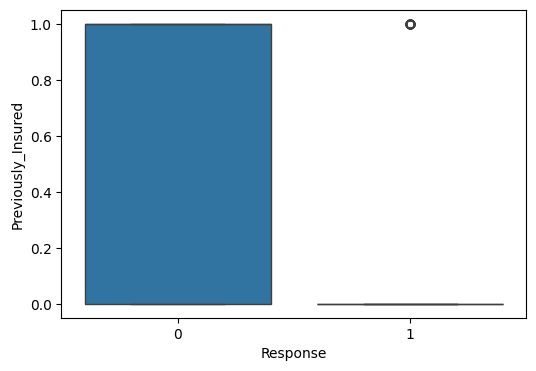

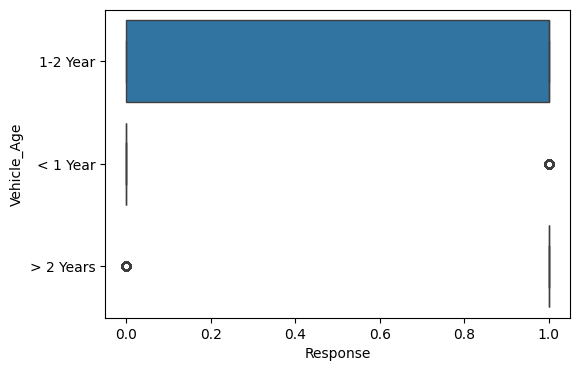

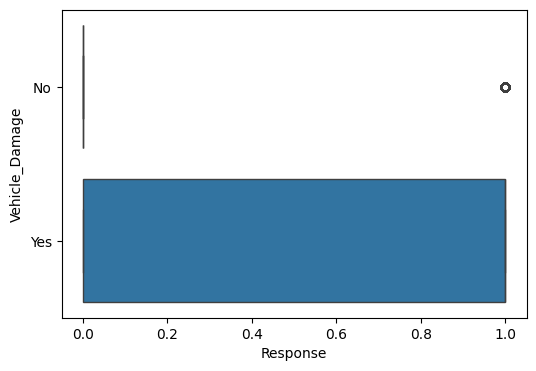

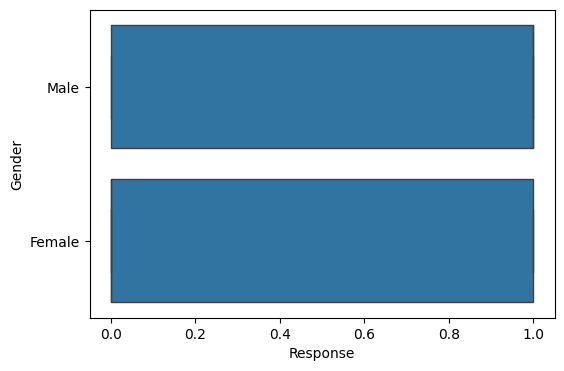

In [56]:
for i in cat_variables:
    plt.figure(figsize=(6, 4))
    sb.boxplot(x='Response', y=i, data=new_data)
    plt.show()

In [57]:
# for categorical vs categorical we can use chi square test:

# i feel like we can drop the driving_license, but before we can test with chi square test:

from scipy.stats import chi2_contingency

for i in cat_variables:
    chi2,p,dof,exp=chi2_contingency(pd.crosstab(new_data[i],new_data['Response']))
    print(i,chi2,p)

Previously_Insured 14340.306352722866 0.0
Vehicle_Age 5234.212849183736 0.0
Vehicle_Damage 14738.04376757918 0.0
Gender 283.64746903687677 1.204390885350193e-63


The Chi square test of previuosly_insured is very high and the p-value is 0, so We can keep this variable 

# we'll calculate the effect size to se whether we can consider Driving_license or not



In [ ]:
table=pd.crosstab(new_data['Driving_License'],new_data['Response'])
chi2,p,dof,exp=chi2_contingency(table)
size=table.sum().sum()
min_dim = min(table.shape[0] - 1,table.shape[1] - 1)
v = (chi2 / size) ** 0.5 / (min_dim ** 0.5) if min_dim > 0 else 0

print(v)



0.01773923404622159


The Effect size of Driving_License is 0 and also by analysing the plot also i can conclude i'll drop the Driving_license feature

In [38]:
new_data.shape

(40000, 12)

In [39]:
new_data.drop(['Driving_License'],axis=1,inplace=True)
new_data.shape

(40000, 11)

In [62]:
for i in cat_variables:
    table=pd.crosstab(new_data[i],new_data['Response'])
    chi2,p,dof,exp=chi2_contingency(table)
    size=table.sum().sum()
    min_dim = min(table.shape[0] - 1,table.shape[1] - 1)
    v = (chi2 / size) ** 0.5 / (min_dim ** 0.5) if min_dim > 0 else 0

    print(i,v)

Previously_Insured 0.5987550908493987
Vehicle_Age 0.3617393000899866
Vehicle_Damage 0.607001725030069
Gender 0.08420918433236317


From the outupt of Cramer's V value and also from the box plot of the categorical variables, im removing the Gender and Vehicle_Age

In [63]:
new_data.drop(['Gender','Vehicle_Age'],axis=1,inplace=True)

In [64]:
new_data.head()

,id,Age,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
9312666,9312666,45,3.0,1,No,40255.0,26.0,0
7451099,7451099,25,29.0,1,No,37886.0,152.0,0
2954187,2954187,48,28.0,0,Yes,45362.0,26.0,0
5438487,5438487,48,28.0,1,No,35124.0,26.0,0
469689,469689,22,41.0,1,No,25775.0,152.0,0


In [65]:
new_data.shape

(40000, 8)

In [67]:
print(new_data['Region_Code'].value_counts())

Region_Code
28.0    14951
8.0      3109
41.0     1937
46.0     1822
29.0     1132
15.0     1111
30.0     1037
11.0      931
3.0       848
50.0      830
36.0      767
33.0      749
35.0      685
47.0      682
45.0      530
6.0       500
18.0      498
39.0      490
37.0      461
14.0      419
10.0      365
21.0      362
48.0      356
7.0       337
13.0      323
2.0       322
9.0       282
12.0      277
24.0      271
32.0      242
38.0      240
27.0      232
43.0      223
17.0      211
20.0      199
31.0      192
26.0      191
4.0       191
23.0      186
19.0      183
0.0       170
25.0      151
16.0      151
49.0      148
34.0      144
5.0       125
1.0       117
40.0      102
22.0       98
44.0       50
42.0       43
51.0       14
52.0       13
Name: count, dtype: int64


In [70]:
def remove_outliers(df,cols):
    d=df.copy()
    for col in cols:
        q1=d[col].quantile(0.25)
        q3=d[col].quantile(0.75)
        iqr=q3-q1
        lower_bound=q1-1.5*iqr
        upper_bound=q3+1.5*iqr
        d=d[(d[col]>lower_bound) & (d[col]<upper_bound)]
    return d

In [75]:
cols=num_variables

cleaned_data=remove_outliers(new_data,cols[1:])
cleaned_data.shape

(39351, 8)

In [76]:
cols

['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel']

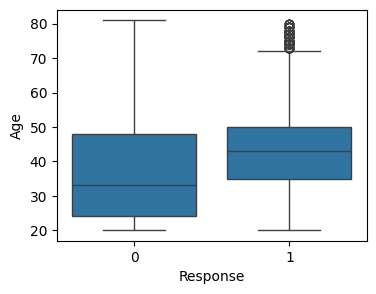

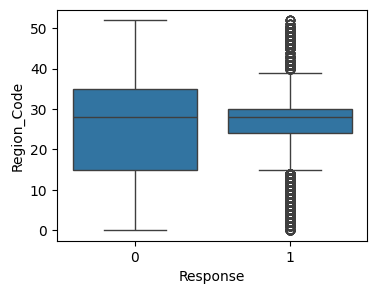

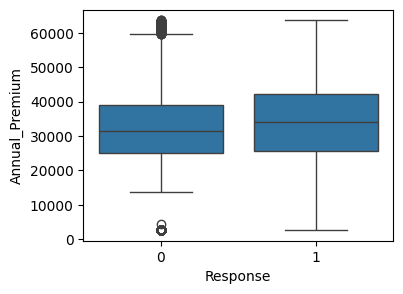

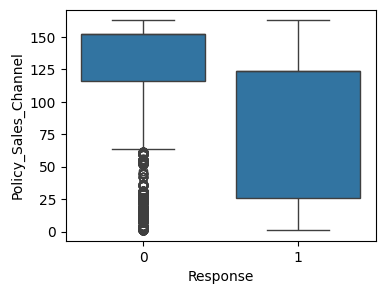

In [78]:
for i in num_variables:
    plt.figure(figsize=(4, 3))
    sb.boxplot(x='Response', y=i, data=cleaned_data)
    plt.show()

In [79]:
cleaned_data.head()

,id,Age,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
9312666,9312666,45,3.0,1,No,40255.0,26.0,0
7451099,7451099,25,29.0,1,No,37886.0,152.0,0
2954187,2954187,48,28.0,0,Yes,45362.0,26.0,0
5438487,5438487,48,28.0,1,No,35124.0,26.0,0
469689,469689,22,41.0,1,No,25775.0,152.0,0


Feature Transformation

In [111]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

In [81]:
num_variables=['Age','Annual_Premium','Policy_Sales_Channel']
low_card_cat_variables=['Previously_Insured','Vehicle_Damage']
high_card_cat_variables=['Region_Code']
target='Response'

In [83]:
for col in high_card_cat_variables:
    target_mean = cleaned_data.groupby(col)[target].mean()
    cleaned_data[col] = cleaned_data[col].map(target_mean)
    
    
cleaned_data = pd.get_dummies(cleaned_data, columns=low_card_cat_variables, drop_first=True)

scaler = MinMaxScaler()
cleaned_data[num_variables] = scaler.fit_transform(cleaned_data[num_variables])

In [84]:
cleaned_data.head()

,id,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Response,Previously_Insured_1,Vehicle_Damage_Yes
9312666,9312666,0.409836,0.523641,0.616399,0.154321,0,True,False
7451099,7451099,0.081967,0.468917,0.577588,0.932099,0,True,False
2954187,2954187,0.459016,0.622645,0.700066,0.154321,0,False,True
5438487,5438487,0.459016,0.622645,0.532339,0.154321,0,True,False
469689,469689,0.032787,0.492987,0.379178,0.932099,0,True,False


In [85]:
cleaned_data.drop(['id'],axis=1,inplace=True)

In [86]:
cleaned_data.head()

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Response,Previously_Insured_1,Vehicle_Damage_Yes
9312666,0.409836,0.523641,0.616399,0.154321,0,True,False
7451099,0.081967,0.468917,0.577588,0.932099,0,True,False
2954187,0.459016,0.622645,0.700066,0.154321,0,False,True
5438487,0.459016,0.622645,0.532339,0.154321,0,True,False
469689,0.032787,0.492987,0.379178,0.932099,0,True,False


In [87]:
X=cleaned_data.drop(['Response'],axis=1)
y=cleaned_data['Response']

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [144]:
classifier=RandomForestClassifier(n_estimators=150,random_state=42)


In [ ]:
# classifier=LogisticRegression(max_iter=10000)

In [145]:
print(classifier)

RandomForestClassifier(n_estimators=150, random_state=42)


In [146]:
classifier.fit(X_train,y_train)

,n_estimators,150
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [147]:
y_pred=classifier.predict(X_test)

In [148]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))



75.54313301994664
[[2764 1168]
 [ 757 3182]]
              precision    recall  f1-score   support

           0       0.79      0.70      0.74      3932
           1       0.73      0.81      0.77      3939

    accuracy                           0.76      7871
   macro avg       0.76      0.76      0.75      7871
weighted avg       0.76      0.76      0.75      7871



In [149]:
sample_test=X_test.iloc[2:3]

In [150]:
print(sample_test)

              Age  Region_Code  Annual_Premium  Policy_Sales_Channel  \
8800923  0.557377     0.487069             0.0              0.759259   

         Previously_Insured_1  Vehicle_Damage_Yes  
8800923                 False                True  


In [151]:
sample_prediction=classifier.predict(sample_test)
print(sample_prediction)

[1]


In [152]:
print(y_test.iloc[2])


1


ROC_Curve:

In [134]:
from sklearn.metrics import roc_curve,roc_auc_score

In [193]:
y_probs=classifier.predict_proba(X_test)[:,1]


In [194]:
fpr,tpr,threshold=roc_curve(y_test,y_probs)

In [129]:
print(fpr)

[0.         0.         0.         ... 0.96770092 0.96820956 1.        ]


In [130]:
print(tpr)

[0.00000000e+00 2.53871541e-04 1.01548616e-03 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


C:\Users\navee\AppData\Local\Temp\ipykernel_32672\2810343214.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


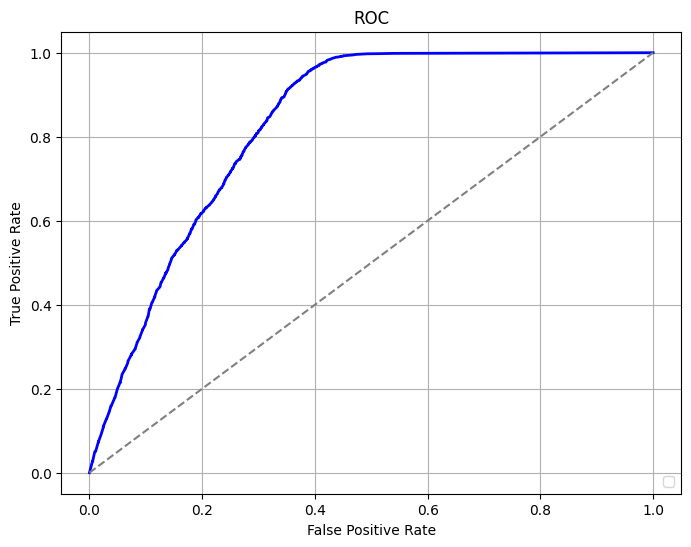

In [195]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2,)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [159]:
print(roc_auc_score(y_test,y_probs))

0.8296946155214941


the auc score is good, it can lower the false positive rate

Hyperparmeter tuning:

I'm choosing the randomizedsearchCV

In [137]:
from sklearn.model_selection import RandomizedSearchCV

In [168]:
parms={
    'n_estimators': [100, 200 ],
    'max_depth': [None, 10, 20],
    'criterion': ['gini', 'entropy']
}

In [169]:
rs=RandomForestClassifier(random_state=42)

In [179]:
random_search=RandomizedSearchCV(
    estimator=rs,
    param_distributions=parms,
    n_iter=15,
    cv=5,
    n_jobs=-1
)

In [180]:
random_search.fit(X_train,y_train)

c:\Users\navee\Desktop\soft_sauve\venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=15. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, ...], 'n_estimators': [100, 200]}"
,n_iter,15
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [184]:
random_model=random_search.best_estimator_


In [196]:
y_pred=random_model.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)

print(classification_report(y_test,y_pred))

79.98983610722907
              precision    recall  f1-score   support

           0       0.92      0.66      0.77      3932
           1       0.73      0.94      0.82      3939

    accuracy                           0.80      7871
   macro avg       0.83      0.80      0.80      7871
weighted avg       0.83      0.80      0.80      7871



In [197]:
y_probs=random_model.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,y_probs))

0.8574535832173091


In [198]:
fpr,tpr,threshold=roc_curve(y_test,y_probs)

C:\Users\navee\AppData\Local\Temp\ipykernel_32672\2812210391.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


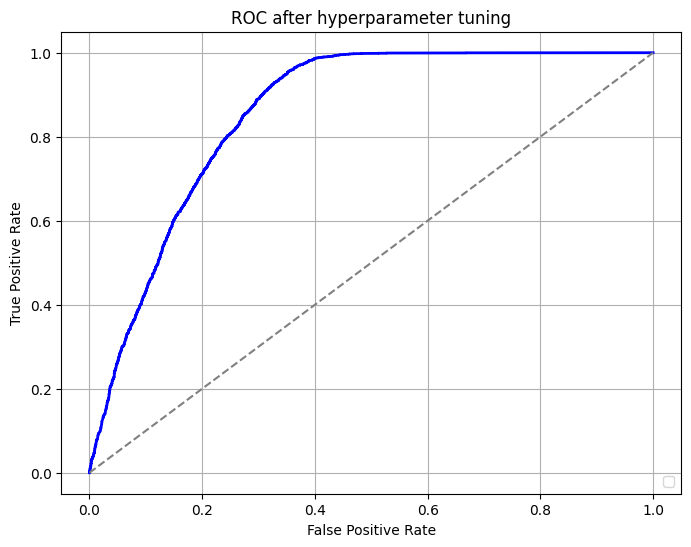

In [199]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2,)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC after hyperparameter tuning')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

We can see that the AUC score is little higher after the hyperparameter tuning. AUC score is higher then that is a good model. and also there is a slight difference in the AUC Curve also.

In [204]:
# testing:


X_test.shape

(7871, 6)

In [210]:
y_test.head()

3247237     1
10510864    1
8800923     1
4488056     0
1871142     0
Name: Response, dtype: int64

In [211]:
sample_to_test_X=X_test.iloc[4:5]
sample_to_test_Y=y_test.iloc[4:5]



print(sample_to_test_X)
print(sample_to_test_Y)

              Age  Region_Code  Annual_Premium  Policy_Sales_Channel  \
1871142  0.016393     0.345356        0.520134              0.932099   

         Previously_Insured_1  Vehicle_Damage_Yes  
1871142                  True               False  
1871142    0
Name: Response, dtype: int64


In [212]:

sample_prediction=classifier.predict(sample_to_test_X)
print(sample_prediction)

[0]


I have used Random Forest Classifier for the classification problem rather than using Logistic Regression , SVM or other classification algorithms because 

it is robust to outliers and can also handle and analyse non-linear relationship among the independent variables to the dependent variables.


It can have n_estimators of decision trees, i have used 100 and from tuning also we have used 100 decision tree, which will be great for dealing overfitting issue which we'll face if we use Decison Tree for Classification.


We can also see in the above that i have plotted to determine the linear relationship of the independent variable to the dependent variable, but it does not show any clear linear relationship, so random forest is useful to predict the outcome for the non linear relationship of the variables. if it shows a linear relationship with the dependent variable, we can go with the Logistic Regresion.